In [13]:
metafile="J2145-0750_1460_C.meta"

import ppalign as ppa
import numpy as np




In [14]:
outfile = "abc.port"
ppa.align_archives(metafile=metafile, initial_guess="1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_31jan2021.raw.gptool.29dec_550_PSR_2145-0750.FITS16",
                   tscrunch=True, pscrunch=True, SNR_cutoff=0.0, outfile=outfile, niter=3, quiet=False)

# Initial guess is an initial guess for an average portrait. I used the highest SNR profile for this.
# In this case, J1646-2142f64avgport.port is the average portrait created from the data files listed in the
# metafile. "f64" denotes that the files have been scrunched to have 64 frequency channels

# It is important to note that bad channels zeroed in the GMRT data processing pipeline must be fully zapped
# before being run through this notebook. I created a very simple shell script to do this and f scrunch to 
# a given number of frequency channels. I have only had total functionality with 64 channels. Input files also
# must be in FITS format. The shell script requires PSRCHIVE tools to work.




Initial guess: 1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_31jan2021.raw.gptool.29dec_550_PSR_2145-0750.FITS16.

Reading data from 1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_31jan2021.raw.gptool.29dec_550_PSR_2145-0750.FITS16 on source PSR_2145-0750...
	P [ms]             = 16.051
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 1260.0000
        bandwidth [MHz]    = 400.0
        # bins in prof     = 64
        # channels         = 128
        # chan (mean)      = 121
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity

Doing iteration 1...
FITS file name: 1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_08dec2020.raw.gptool.29dec_550_PSR_2145-0750.FITS16.

Reading data from 1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_08dec2020.raw.gptool.29dec_550_PSR_2145-0750.FITS16 on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 pc]     = 8.99761

In [15]:
import ppspline as pps
avgport = outfile
dp = pps.DataPortrait(avgport)
dp.normalize_portrait("prof")

# This initializes the portrait be modeled by the spline model later. It is normalized 
# by the average portrait created earlier, so as to clearly model any frequency-dependent
# profile evolution.



Reading data from abc.port on source PSR_2145-0750...
	P [ms]             = 16.051
        DM [cm**-3 pc]     = 0.000000
        center freq. [MHz] = 1260.0000
        bandwidth [MHz]    = 400.0
        # bins in prof     = 64
        # channels         = 128
        # chan (mean)      = 121
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity



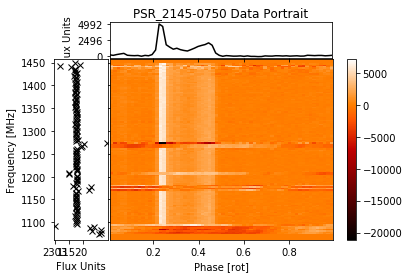

In [16]:
dp.show_data_portrait()

In [17]:
# Mainly set to defaults. SNR cutoffs removed
smooth = True
rchi2_tol = 0.1 #What is this factor
k = 5
sfac = 1.0
max_nbreak = 2

# Setting default arguments for the make_spline_model() seen below. It is important to set
# max_nbreak = None. Otherwise, the spline model will have many breakpoints and not accurately
# model the profile evolution.
dp.make_spline_model(smooth=smooth, rchi2_tol=rchi2_tol, k=k, sfac=sfac,
                    max_nbreak=max_nbreak, model_name=None, quiet=False, snr_cutoff=300.0)
# Creation of spline model. snr_cutoff is default to 150 but tweaking may be needed to
# get 1 - 2 "significant" eigenprofiles. Somewhat arbitrary.


Performing principal component analysis on data with 64 dimensions and 121 measurements...
B-spline interpolation model abc.port.spl uses 0 basis profile components; it returns the average profile.


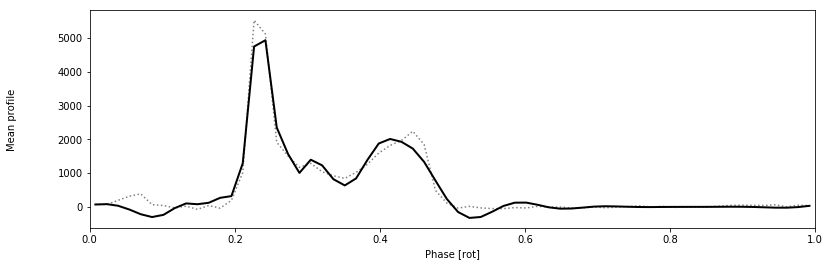

In [18]:
dp.show_eigenprofiles(show_snrs=True)
# Showing average profile and eigenprofile(s)


In [19]:
dp.show_spline_curve_projections()
# Shows a projection of how the eigenprofile(s) changes according to frequency and to each other.


In [20]:
J2145_fit_modelfile = "J2145-0750_splinefit.spl"
dp.write_model(J2145_fit_modelfile, quiet=False)

# Writes spline model to a file.


Wrote modelfile J2145-0750_splinefit.spl.



Reading data from 1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_08dec2020.raw.gptool.29dec_550_PSR_2145-0750.FITS16 on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 1260.0000
        bandwidth [MHz]    = 400.0
        # bins in prof     = 64
        # channels         = 128
        # chan (mean)      = 121
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 436.47 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_08dec2020.raw.gptool.29dec_550_PSR_2145-0750.FITS16
~0.0301 sec/TOA
Med. TOA error is 1.750 us

Reading data from 1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_08dec2020.raw.gptool.29dec_550_PSR_2145-0750.FITS16 on source PSR_2145-0750...
	P [ms]             = 16.053
        DM [cm**-3 p

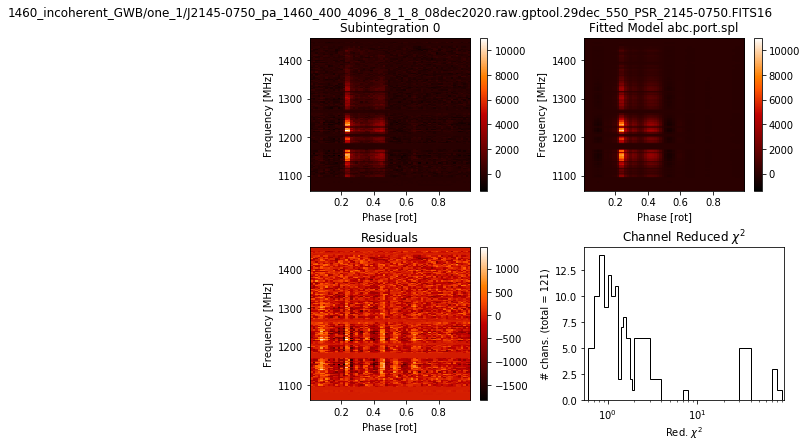


Reading data from 1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_14mar2021.raw.gptool.29dec_550_PSR_2145-0750.FITS16 on source PSR_2145-0750...
	P [ms]             = 16.051
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 1260.0000
        bandwidth [MHz]    = 400.0
        # bins in prof     = 64
        # channels         = 128
        # chan (mean)      = 121
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2689.60 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_14mar2021.raw.gptool.29dec_550_PSR_2145-0750.FITS16
~0.0295 sec/TOA
Med. TOA error is 2.182 us

Reading data from 1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_14mar2021.raw.gptool.29dec_550_PSR_2145-0750.FITS16 on source PSR_2145-0750...
	P [ms]             = 16.051
        DM [cm**-3 

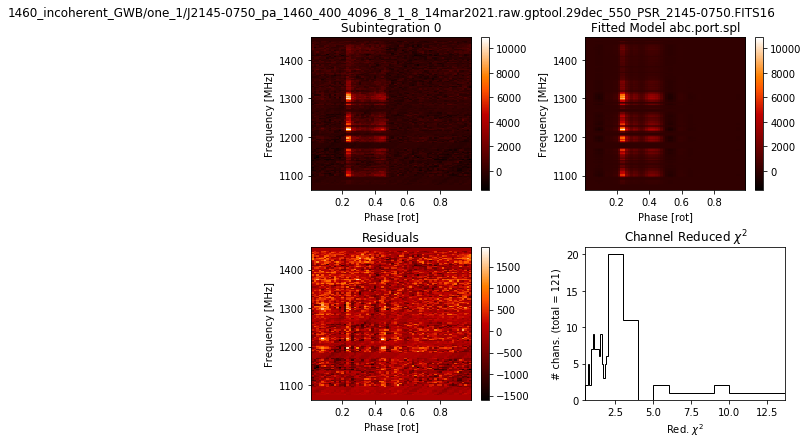


Reading data from 1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_16nov2020.raw.gptool.29dec_550_PSR_2145-0750.FITS16 on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 1260.0000
        bandwidth [MHz]    = 400.0
        # bins in prof     = 64
        # channels         = 128
        # chan (mean)      = 121
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 2949.12 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_16nov2020.raw.gptool.29dec_550_PSR_2145-0750.FITS16
~0.0201 sec/TOA
Med. TOA error is 1.152 us

Reading data from 1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_16nov2020.raw.gptool.29dec_550_PSR_2145-0750.FITS16 on source PSR_2145-0750...
	P [ms]             = 16.052
        DM [cm**-3 

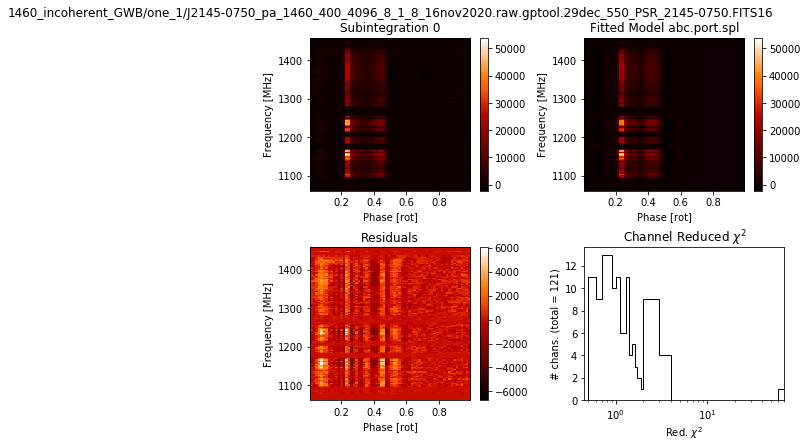


Reading data from 1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_29dec2020.raw.gptool.29dec_550_PSR_2145-0750.FITS16 on source PSR_2145-0750...
	P [ms]             = 16.054
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 1260.0000
        bandwidth [MHz]    = 400.0
        # bins in prof     = 64
        # channels         = 128
        # chan (mean)      = 121
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1793.06 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_29dec2020.raw.gptool.29dec_550_PSR_2145-0750.FITS16
~0.0257 sec/TOA
Med. TOA error is 1.993 us

Reading data from 1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_29dec2020.raw.gptool.29dec_550_PSR_2145-0750.FITS16 on source PSR_2145-0750...
	P [ms]             = 16.054
        DM [cm**-3 

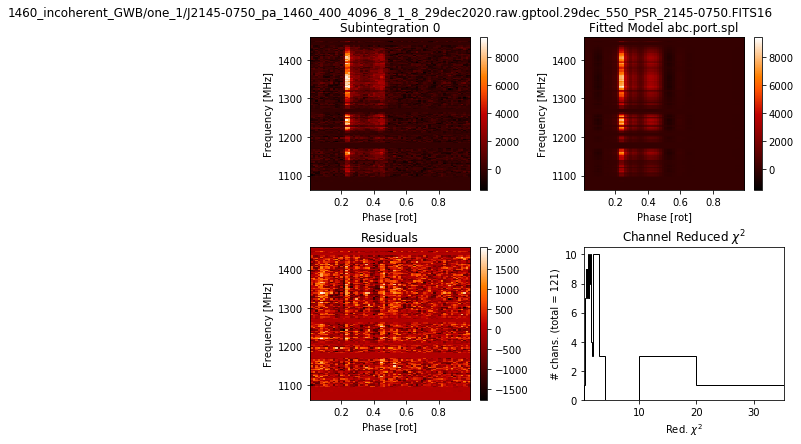


Reading data from 1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_31jan2021.raw.gptool.29dec_550_PSR_2145-0750.FITS16 on source PSR_2145-0750...
	P [ms]             = 16.051
        DM [cm**-3 pc]     = 8.997610
        center freq. [MHz] = 1260.0000
        bandwidth [MHz]    = 400.0
        # bins in prof     = 64
        # channels         = 128
        # chan (mean)      = 121
        # subints          = 1
        # unzapped subint  = 1
        pol'n state        = Intensity


Each of the 1 TOAs is approximately 1793.06 s
Reading model from J2145-0750_splinefit.spl...
Fitting for TOA #1
--------------------------
1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_31jan2021.raw.gptool.29dec_550_PSR_2145-0750.FITS16
~0.0191 sec/TOA
Med. TOA error is 1.580 us

Reading data from 1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_31jan2021.raw.gptool.29dec_550_PSR_2145-0750.FITS16 on source PSR_2145-0750...
	P [ms]             = 16.051
        DM [cm**-3 

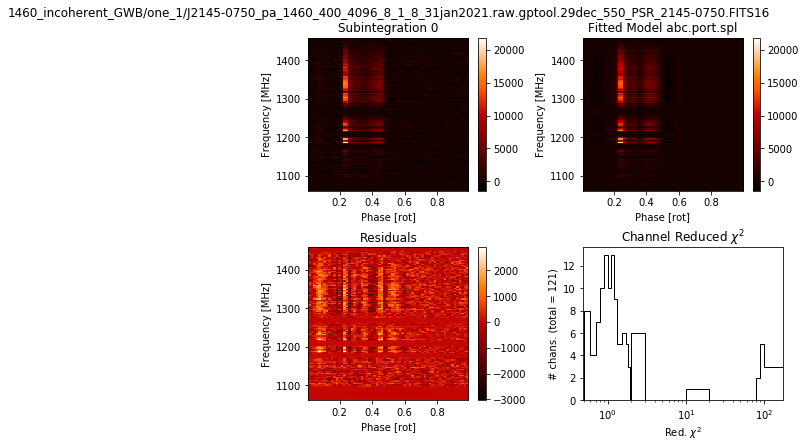

--------------------------
Total time: 0.26 sec, ~0.0525 sec/TOA


In [21]:
import pptoas as ppt
from pplib import write_TOAs
toaprogmeta = "J2145-0750_1460_C.meta"
gt = ppt.GetTOAs(toaprogmeta, J2145_fit_modelfile)
gt.get_TOAs(bary=True,show_plot=True)


In [22]:
# TOAs produced. Can see number of TOAs produced per epoch as well as median TOA error for
# each epoch.
#gt.show_fit(datafile=None, isub=0)  # datafile=None will just select the first datafile from the metafile
timfile = "22May2k21_WB_C_1460_J2145-0750_1tX16f_0eig.tim"
write_TOAs(gt.TOA_list, SNR_cutoff=0.0, outfile=timfile, append=False)
# Writing of TOAs to tim file. Writes in TEMPO format. Can copy paste "freq MJD uncert"
# information into another tim file.

In [23]:
fil = open('22May2k21_WB_C_1460_J2145-0750_1tX16f_0eig.tim', 'r')
for line in fil:
    print(line)

1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_08dec2020.raw.gptool.29dec_550_PSR_2145-0750.FITS16 1214.41778907 59191.519208945549963   1.750  gmrt -pp_dm 9.0011311 -pp_dme 0.0053686 -be  -nchx 121 -tobs 436.470 -f _ -gof 3.214 -snr 214.188 -fratio 1.349 -subint 0 -nch 128 -bw 375.000 -chbw 3.125 -fe  -nbin 64 -tmplt J2145-0750_splinefit.spl

1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_14mar2021.raw.gptool.29dec_550_PSR_2145-0750.FITS16 1222.52580102 59287.266979816706013   2.182  gmrt -pp_dm 8.9965463 -pp_dme 0.0060501 -be  -nchx 121 -tobs 2689.597 -f _ -gof 1.691 -snr 168.147 -fratio 1.349 -subint 0 -nch 128 -bw 375.000 -chbw 3.125 -fe  -nbin 64 -tmplt J2145-0750_splinefit.spl

1460_incoherent_GWB/one_1/J2145-0750_pa_1460_400_4096_8_1_8_16nov2020.raw.gptool.29dec_550_PSR_2145-0750.FITS16 1250.08353001 59169.589859126533230   1.152  gmrt -pp_dm 9.0009501 -pp_dme 0.0026186 -be  -nchx 121 -tobs 2949.120 -f _ -gof 1.226 -snr 319.187 -fratio 1.349 -subint 0 -